In [213]:
from MRI_DistortionQA.MarkerAnalysis import MarkerVolume
from pathlib import Path
import numpy as np
import pandas as pd
from skimage.measure import label
import copy
import matplotlib.pyplot as plt

Median marker volume: 40.0
Expected marker volume: 3.999999999999999 to 80.0
regions to check: (337,)
Region 1: Marker, v = 45
Region 2: Marker, v = 49
Region 3: Marker, v = 46
Region 4: Marker, v = 36
Region 5: Marker, v = 36
Region 6: Marker, v = 42
Region 7: Marker, v = 50
Region 8: Marker, v = 39
Region 9: Marker, v = 38
Region 10: Marker, v = 35
Region 11: Marker, v = 33
Region 12: Marker, v = 39
Region 13: Marker, v = 40
Region 14: Marker, v = 48
Region 15: Marker, v = 33
Region 16: Marker, v = 37
Region 17: Marker, v = 28
Region 18: Marker, v = 37
Region 19: Marker, v = 46
Region 20: Marker, v = 27
Region 21: Marker, v = 34
Region 22: Marker, v = 28
Region 23: Marker, v = 37
Region 24: Marker, v = 35
Region 25: Marker, v = 39
Region 26: Marker, v = 37
Region 27: Marker, v = 41
Region 28: Marker, v = 38
Region 29: Marker, v = 48
Region 30: Marker, v = 34
Region 31: Marker, v = 28
Region 32: Marker, v = 43
Region 33: Marker, v = 32
Region 34: Marker, v = 39
Region 35: Marker, v = 

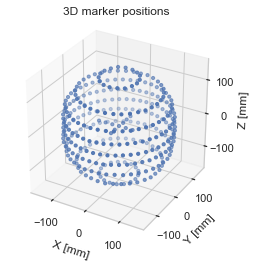

336


In [275]:
# This data was acquired on 13/04/2022, it already worked well with Otsu threshold
# Number of maerkers was 336

data_loc = Path(r'C:\Users\pliu4890\OneDrive - The University of Sydney (Staff)\Documents\MRI-Linac\Experiments\20220413 Full sphere foam Goam')
# ^^ update to where you put the sample data!!
marker_volumeAP = MarkerVolume(data_loc / '20220413 MR Linac^Test' / '04 gre_trans_AP_330' / 'Original', verbose=True)
marker_volumeAP.plot_3D_markers()  # produce a quick plot of marker positions
print(len(marker_volumeAP.MarkerCentroids))

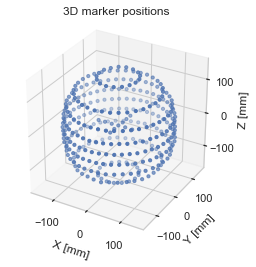

336


In [276]:
data_loc = Path(r'C:\Users\pliu4890\OneDrive - The University of Sydney (Staff)\Documents\MRI-Linac\Experiments\20220413 Full sphere foam Goam')
# ^^ update to where you put the sample data!!
marker_volumePA = MarkerVolume(data_loc / '20220413 MR Linac^Test' / '05 gre_trans_PA_330' / 'Original', verbose=False, gaussian_image_filter_sd=0.5)
marker_volumePA.plot_3D_markers()  # produce a quick plot of marker positions
print(len(marker_volumePA.MarkerCentroids))

In [50]:
print(np.min(marker_volumeAP.BlurredVolume))
print(np.max(marker_volumeAP.BlurredVolume))
print(marker_volumeAP._cutoffpoint)
print(np.median(np.round(marker_volumeAP.BlurredVolume)))
print(np.std(marker_volumeAP.BlurredVolume))

3.179445039106733
126.41132282975968
37.597723406418
20.0
5.2839862194276845


In [342]:
def find_iterative_cutoff(blurred_volume, n_expected):

    # finds a range of thresholds that give a number of segments near to the number of expected markers
    histogram_division = 200
    valid_thresholds = []

    # divide the range into segments and calculate how many volumes result from each segment
    background_value = np.median(np.round(blurred_volume))
    intensity_range = np.max(blurred_volume) - background_value
    histogram_segment = intensity_range / histogram_division

    # Testing each histogram segment
    for i in range(1, histogram_division - 1):

        n_segments = 0

        cutoff = background_value + i * histogram_segment
        threshold_volume = blurred_volume > cutoff

        labels = label(threshold_volume, background=0)
        unique_labels = np.unique(labels)[1:]  # first label is background so skip

        # Check number of segments falls within valid range:
        if len(unique_labels) < n_expected or len(unique_labels) > n_expected * 1.2:
            continue    # Too few or too many segments
        else:
            for label_level in unique_labels:  # first label is background so skip
                RegionInd = labels == label_level
                if np.count_nonzero(RegionInd) > 2:
                    n_segments += 1

            if n_segments > n_expected:
                valid_thresholds.append(cutoff)
                print('Threshold: ' + str(format(cutoff, '.2f')) + ', ' + str(n_segments) + ' segments')

    return np.mean(valid_thresholds)

In [343]:
threshold = variable_cutoff(marker_volumeAP.BlurredVolume, 336)
print(threshold)

Threshold: 28.51, 348 segments
Threshold: 29.04, 342 segments
Threshold: 29.58, 337 segments
Threshold: 30.11, 338 segments
Threshold: 30.64, 337 segments
Threshold: 33.30, 337 segments
Threshold: 33.83, 337 segments
Threshold: 34.37, 337 segments
Threshold: 34.90, 337 segments
Threshold: 35.43, 337 segments
Threshold: 35.96, 337 segments
Threshold: 36.49, 337 segments
Threshold: 37.03, 337 segments
Threshold: 37.56, 337 segments
Threshold: 38.09, 337 segments
Threshold: 38.62, 337 segments
Threshold: 39.15, 337 segments
Threshold: 39.69, 337 segments
34.572439487519866


Median marker volume: 49.0
Expected marker volume: 4.899999999999999 to 98.0
regions to check: (337,)
Region 1: Marker, v = 54
Region 2: Marker, v = 55
Region 3: Marker, v = 59
Region 4: Marker, v = 47
Region 5: Marker, v = 56
Region 6: Marker, v = 47
Region 7: Marker, v = 50
Region 8: Marker, v = 53
Region 9: Marker, v = 45
Region 10: Marker, v = 46
Region 11: Marker, v = 46
Region 12: Marker, v = 48
Region 13: Marker, v = 45
Region 14: Marker, v = 57
Region 15: Marker, v = 53
Region 16: Marker, v = 43
Region 17: Marker, v = 43
Region 18: Marker, v = 34
Region 19: Marker, v = 43
Region 20: Marker, v = 47
Region 21: Marker, v = 38
Region 22: Marker, v = 38
Region 23: Marker, v = 49
Region 24: Marker, v = 42
Region 25: Marker, v = 42
Region 26: Marker, v = 46
Region 27: Marker, v = 48
Region 28: Marker, v = 47
Region 29: Marker, v = 56
Region 30: Marker, v = 41
Region 31: Marker, v = 39
Region 32: Marker, v = 50
Region 33: Marker, v = 44
Region 34: Marker, v = 43
Region 35: Marker, v = 

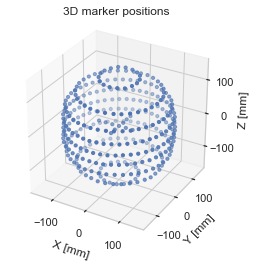

336


In [345]:
marker_volumeAP_variable = copy.copy(marker_volumeAP)

marker_volumeAP_variable._cutoffpoint = threshold
#marker_volumeAP_variable._marker_size_upper_tol = 1000

marker_volumeAP_variable.ThresholdVolume, marker_volumeAP_variable.BlurredVolume = marker_volumeAP_variable._threshold_volume(marker_volumeAP_variable.InputVolume)
centroids = marker_volumeAP_variable._find_contour_centroids()
marker_volumeAP_variable.MarkerCentroids = pd.DataFrame(centroids, columns=['x', 'y', 'z'])
marker_volumeAP_variable.plot_3D_markers()  # produce a quick plot of marker positions
print(len(marker_volumeAP_variable.MarkerCentroids))

Median marker volume: 40.0
Expected marker volume: 3.999999999999999 to 80.0
regions to check: (362,)
Region 1: Marker, v = 4
Region 2: Skipped, v = 1
Region 3: Skipped, v = 1
Region 4: Marker, v = 49
Region 5: Marker, v = 71
Region 6: Marker, v = 55
Region 7: Marker, v = 40
Region 8: Marker, v = 44
Region 9: Marker, v = 60
Region 10: Marker, v = 43
Region 11: Marker, v = 48
Region 12: Marker, v = 40
Region 13: Marker, v = 41
Region 14: Marker, v = 41
Region 15: Marker, v = 51
Region 16: Marker, v = 38
Region 17: Marker, v = 38
Region 18: Marker, v = 54
Region 19: Marker, v = 57
Region 20: Marker, v = 55
Region 21: Marker, v = 41
Region 22: Marker, v = 37
Region 23: Marker, v = 42
Region 24: Marker, v = 42
Region 25: Marker, v = 37
Region 26: Marker, v = 39
Region 27: Marker, v = 50
Region 28: Marker, v = 37
Region 29: Marker, v = 27
Region 30: Marker, v = 33
Region 31: Marker, v = 41
Region 32: Marker, v = 41
Region 33: Marker, v = 61
Region 34: Marker, v = 28
Region 35: Marker, v = 3

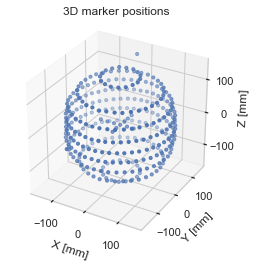

45.96497171106784
338


In [346]:
# This data was acquired on 28/04/2022, it didn't work very well with Otsu
# Number of maerkers was 336

data_loc = Path(r'C:\Users\pliu4890\OneDrive - The University of Sydney (Staff)\Documents\MRI-Linac\Experiments\20220413 Full sphere foam Goam')
# ^^ update to where you put the sample data!!
marker_volume_noisy = MarkerVolume(data_loc / '20220428 MR Linac^Test' / '09 gre_trans_AP_330' / 'Original', verbose=True, gaussian_image_filter_sd=1)
marker_volume_noisy.plot_3D_markers()  # produce a quick plot of marker positions
print(marker_volume_noisy._cutoffpoint)
print(len(marker_volume_noisy.MarkerCentroids))

In [347]:
thresholds = variable_cutoff(marker_volume_noisy.BlurredVolume, 336)
print(np.mean(thresholds))

Threshold: 44.45, 356 segments
Threshold: 44.95, 352 segments
Threshold: 45.45, 343 segments
Threshold: 45.95, 341 segments
Threshold: 46.44, 340 segments
Threshold: 46.94, 339 segments
Threshold: 47.44, 338 segments
Threshold: 47.94, 338 segments
Threshold: 48.44, 337 segments
Threshold: 48.94, 337 segments
Threshold: 49.43, 337 segments
Threshold: 49.93, 337 segments
Threshold: 50.43, 337 segments
Threshold: 50.93, 337 segments
Threshold: 51.43, 337 segments
Threshold: 51.93, 337 segments
48.188707822000865


Median marker volume: 35.0
Expected marker volume: 3.499999999999999 to 70.0
regions to check: (343,)
Region 1: Skipped, v = 1
Region 2: Marker, v = 41
Region 3: Marker, v = 45
Region 4: Marker, v = 38
Region 5: Marker, v = 52
Region 6: Marker, v = 55
Region 7: Marker, v = 32
Region 8: Marker, v = 32
Region 9: Marker, v = 41
Region 10: Marker, v = 32
Region 11: Marker, v = 36
Region 12: Marker, v = 35
Region 13: Marker, v = 47
Region 14: Marker, v = 32
Region 15: Marker, v = 28
Region 16: Marker, v = 42
Region 17: Marker, v = 52
Region 18: Marker, v = 45
Region 19: Marker, v = 32
Region 20: Marker, v = 34
Region 21: Marker, v = 35
Region 22: Marker, v = 30
Region 23: Marker, v = 36
Region 24: Marker, v = 42
Region 25: Marker, v = 36
Region 26: Marker, v = 31
Region 27: Marker, v = 27
Region 28: Marker, v = 37
Region 29: Marker, v = 36
Region 30: Marker, v = 52
Region 31: Marker, v = 20
Region 32: Marker, v = 25
Region 33: Marker, v = 33
Region 34: Marker, v = 30
Region 35: Marker, v = 

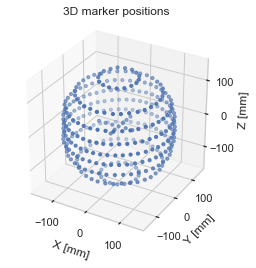

336


In [348]:
marker_volumeAP_noisy_variable = copy.copy(marker_volume_noisy)

marker_volumeAP_noisy_variable._cutoffpoint = thresholds
# marker_volumeAP_noisy_variable._marker_size_upper_tol = 100

marker_volumeAP_noisy_variable.ThresholdVolume, marker_volumeAP_noisy_variable.BlurredVolume = marker_volumeAP_noisy_variable._threshold_volume(marker_volumeAP_noisy_variable.InputVolume)
centroids = marker_volumeAP_noisy_variable._find_contour_centroids()
marker_volumeAP_noisy_variable.MarkerCentroids = pd.DataFrame(centroids, columns=['x', 'y', 'z'])
marker_volumeAP_noisy_variable.plot_3D_markers()  # produce a quick plot of marker positions
print(len(marker_volumeAP_noisy_variable.MarkerCentroids))

In [324]:
marker_volumeAP_noisy_variable.export_to_slicer()

Median marker volume: 2.0
Expected marker volume: 0.19999999999999996 to 4.0
regions to check: (17,)
Region 1: Marker, v = 2
Region 2: Marker, v = 2
Region 3: Marker, v = 1
Region 4: Marker, v = 2
Region 5: Marker, v = 2
Region 6: Marker, v = 2
Region 7: Marker, v = 1
Region 8: Marker, v = 1
Region 9: Marker, v = 1
Region 10: Skipped, v = 20218
Region 11: Marker, v = 2
Region 12: Marker, v = 3
Region 13: Marker, v = 2
Region 14: Marker, v = 1
Region 15: Marker, v = 1
Region 16: Marker, v = 1
Region 17: Marker, v = 1
----------
Total regions: 17
Total markers found: 16
Total skipped: 1


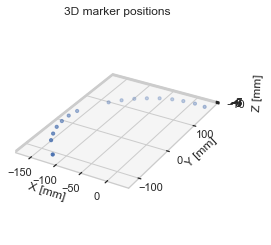

221.1281069670326
16


In [339]:
# This data was acquired on 02/06/2022, load volume breaks otsu
# Number of maerkers was

data_loc = Path(r'C:\Users\pliu4890\OneDrive - The University of Sydney (Staff)\Documents\MRI-Linac\Experiments\20220413 Full sphere foam Goam')
# ^^ update to where you put the sample data!!
marker_volume_noisy = MarkerVolume(data_loc / '20220602 MR Linac^Test' / '02 gre_tra_AP' / 'Original', verbose=True, gaussian_image_filter_sd=0.8)
marker_volume_noisy.plot_3D_markers()  # produce a quick plot of marker positions
print(marker_volume_noisy._cutoffpoint)
print(len(marker_volume_noisy.MarkerCentroids))

In [340]:
threshold = variable_cutoff(marker_volume_noisy.BlurredVolume, 145)
print(threshold)

Threshold: 86.14, 146 segments
Threshold: 89.31, 146 segments
Threshold: 92.49, 146 segments
Threshold: 95.66, 146 segments
Threshold: 98.83, 146 segments
Threshold: 102.01, 146 segments
Threshold: 105.18, 146 segments
Threshold: 108.36, 146 segments
97.24688722999244


Median marker volume: 15.5
Expected marker volume: 1.5499999999999996 to 4665.5
regions to check: (146,)
Region 1: Marker, v = 12
Region 2: Marker, v = 11
Region 3: Marker, v = 11
Region 4: Marker, v = 16
Region 5: Marker, v = 10
Region 6: Marker, v = 20
Region 7: Marker, v = 11
Region 8: Marker, v = 23
Region 9: Marker, v = 14
Region 10: Marker, v = 13
Region 11: Marker, v = 13
Region 12: Marker, v = 8
Region 13: Marker, v = 14
Region 14: Marker, v = 12
Region 15: Marker, v = 20
Region 16: Marker, v = 11
Region 17: Marker, v = 17
Region 18: Marker, v = 10
Region 19: Marker, v = 13
Region 20: Marker, v = 26
Region 21: Marker, v = 10
Region 22: Marker, v = 7
Region 23: Marker, v = 11
Region 24: Marker, v = 13
Region 25: Marker, v = 15
Region 26: Marker, v = 12
Region 27: Marker, v = 8
Region 28: Marker, v = 12
Region 29: Marker, v = 28
Region 30: Marker, v = 18
Region 31: Marker, v = 10
Region 32: Marker, v = 12
Region 33: Marker, v = 10
Region 34: Marker, v = 14
Region 35: Marker, v = 

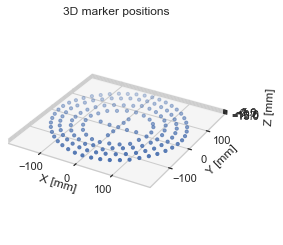

145


In [341]:
marker_volumeAP_noisy_variable = copy.copy(marker_volume_noisy)

marker_volumeAP_noisy_variable._cutoffpoint = threshold
marker_volumeAP_noisy_variable._marker_size_upper_tol = 300

marker_volumeAP_noisy_variable.ThresholdVolume, marker_volumeAP_noisy_variable.BlurredVolume = marker_volumeAP_noisy_variable._threshold_volume(marker_volumeAP_noisy_variable.InputVolume)
centroids = marker_volumeAP_noisy_variable._find_contour_centroids()
marker_volumeAP_noisy_variable.MarkerCentroids = pd.DataFrame(centroids, columns=['x', 'y', 'z'])
marker_volumeAP_noisy_variable.plot_3D_markers()  # produce a quick plot of marker positions
print(len(marker_volumeAP_noisy_variable.MarkerCentroids))

In [206]:
marker_volumeAP_noisy_variable.export_to_slicer()

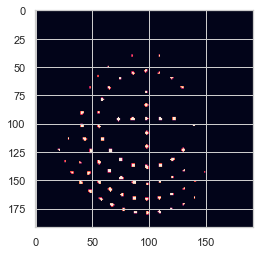

In [333]:
plt.imshow(marker_volumeAP_noisy_variable.ThresholdVolume[:,:,16])